<a href="https://colab.research.google.com/github/hemanth-22000/ANN/blob/main/Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

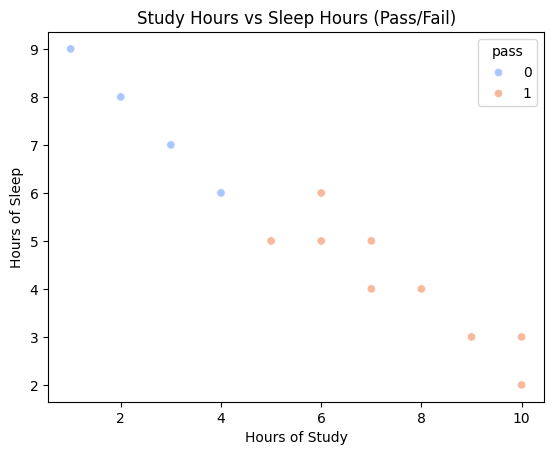

Accuracy: 1.00
Confusion Matrix:
[[3 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


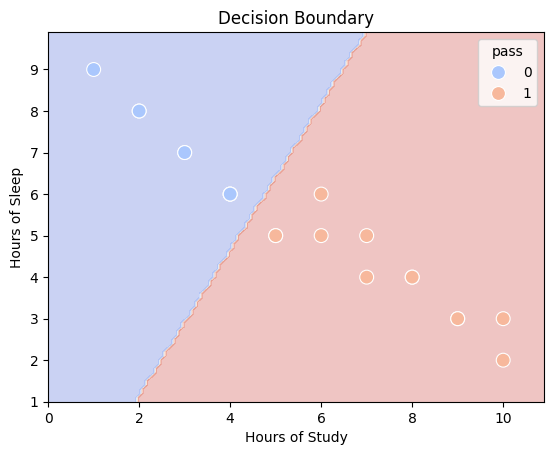

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Create a sample dataset
data = {
    'hours_study': [2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 2, 4, 6, 8, 10, 3, 5, 7, 9, 4],
    'hours_sleep': [8, 7, 6, 5, 9, 6, 5, 4, 3, 2, 8, 6, 5, 4, 3, 7, 5, 4, 3, 6],
    'pass': [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
}
df = pd.DataFrame(data)
# Visualize the data
sns.scatterplot(data=df, x='hours_study', y='hours_sleep', hue='pass', palette='coolwarm')
plt.xlabel('Hours of Study')
plt.ylabel('Hours of Sleep')
plt.title('Study Hours vs Sleep Hours (Pass/Fail)')
plt.show()

# Split the data into features and target variable
X = df[['hours_study', 'hours_sleep']]
y = df['pass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X['hours_study'].min() - 1, X['hours_study'].max() + 1
    y_min, y_max = X['hours_sleep'].min() - 1, X['hours_sleep'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(data=X, x='hours_study', y='hours_sleep', hue=y, palette='coolwarm', edgecolor='w', s=100)
    plt.xlabel('Hours of Study')
    plt.ylabel('Hours of Sleep')
    plt.title('Decision Boundary')
    plt.show()
# Plot the decision boundary
plot_decision_boundary(model, df[['hours_study', 'hours_sleep']], df['pass'])